In [7]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted
from sklearn.datasets import make_blobs
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
def plot_scatter(X, color, alpha=0.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")

Test de Kolmogorov-Smirnov para comparar X y X_new:
Estadística KS: 0.5183, p-valor: 0.0000

Se rechaza la hipótesis nula. Las distribuciones de X y X_new son diferentes.


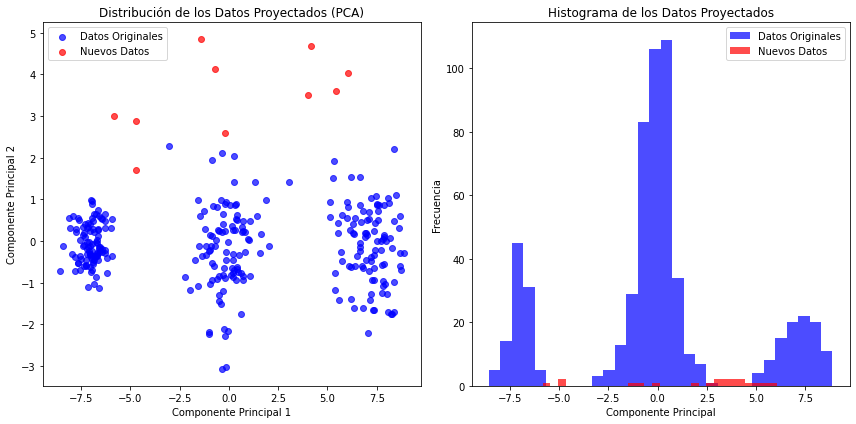

In [6]:
# Parámetros
N_SAMPLES = 300
RANDOM_STATE = 42

# Generar datos (data1)
X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=[1.0, 1.0, 0.5],
    centers=[(-5, -5), (0, 0), (5, 5)],
    random_state=RANDOM_STATE,
)

# Generar nuevos datos (data2)
X_new, y_new = make_blobs(
    n_samples=10,
    centers=[(-7, -1), (-2, 4), (3, 6)],
    random_state=RANDOM_STATE,
)

# Concatenar X y X_new para aplicar PCA sobre ambos conjuntos juntos
X_combined = np.concatenate([X, X_new], axis=0)

# Aplicar PCA al conjunto combinado
pca = PCA(n_components=2) 
X_pca_combined = pca.fit_transform(X_combined)

# Proyectar X y X_new usando el mismo PCA
X_pca = X_pca_combined[:len(X)]  # Proyección de los datos originales
X_new_pca = X_pca_combined[len(X):]  # Proyección de los nuevos datos

# Aplicar el Test de Kolmogorov-Smirnov para comparar las distribuciones de X y X_new
ks_statistic, p_value = ks_2samp(X_pca.flatten(), X_new_pca.flatten())

# Mostrar los resultados
print("Test de Kolmogorov-Smirnov para comparar X y X_new:")
print(f"Estadística KS: {ks_statistic:.4f}, p-valor: {p_value:.4f}")

# Condición de aceptación o rechazo de la hipótesis nula
alpha = 0.05  # Nivel de significancia comúnmente usado (5%)

if p_value > alpha:
    print("\nNo se rechaza la hipótesis nula. Las distribuciones de X y X_new son iguales.")
else:
    print("\nSe rechaza la hipótesis nula. Las distribuciones de X y X_new son diferentes.")


# Graficar los resultados
plt.figure(figsize=(12, 6))

# Subgráfico 1: Scatter plot de los datos proyectados en PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Datos Originales', alpha=0.7)
plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1], c='red', label='Nuevos Datos', alpha=0.7)
plt.title('Distribución de los Datos Proyectados (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Subgráfico 2: Histogramas de las componentes principales
plt.subplot(1, 2, 2)
plt.hist(X_pca.flatten(), bins=30, alpha=0.7, label='Datos Originales', color='blue')
plt.hist(X_new_pca.flatten(), bins=30, alpha=0.7, label='Nuevos Datos', color='red')
plt.title('Histograma de los Datos Proyectados')
plt.xlabel('Componente Principal')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()

plt.show()
